In [1]:
import sys
sys.path.insert(0, '../src')

from megs.model.mPCA import mPCA
from megs.data import image, DataLoader, Galaxy

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

import numpy as np
import pickle
from tqdm import trange
import seaborn as sns
sns.set_context("paper", font_scale=1.5)


In [2]:
# Load model from pickle
with open("2dmodel60.pkl", 'rb') as f:
    mm = pickle.load(f)

In [3]:
scores = mm.get_scores()
eigengalaxies = mm.get_eigengalaxies()
means = mm.get_means()
images = mm.get_images()
rec = mm.inverse_transformed_datamatrix.reshape(-1,3, 64, 64)

In [4]:
def reconstruct_single(galindex, n_components, original=images, scores=scores, eigen=eigengalaxies, means=means, plot=True, cmap=None, 
                savepath = None, show = True, labelsize=20,w_pad = 0.1,h_pad = 0.1, text_coords=(-32,32), figsize=(15,15)):
    og = original[galindex]
    score = scores[galindex][:n_components]
    eig = eigen[:n_components]

    # give the arguments that would sort the scores in descending order
    sort_args = np.argsort(score)[::-1]
    
    
    eig = eig.reshape(n_components, 3 * 64 ** 2)
    means = means.reshape(3 * 64 ** 2)
    reconstructed = np.dot(score, eig) + means
    reconstructed = reconstructed.reshape(3, 64, 64)
    residue = og - reconstructed.reshape(3, 64, 64)

    # Calculate the range for the residue images
    residue_min = np.min(residue)
    residue_max = np.max(residue)
    fields = ["Metallicity", "Stellar Age", "Masses"]
    if cmap is None:
        cmap = {"Metallicity": "magma", "Stellar Age": "gist_heat", "Masses": "cividis"}
    if plot:
        fig = plt.figure(figsize=figsize)
        gs = GridSpec(3, 4, width_ratios=[1, 1, 1, 0.1])  # Adjust width ratios to accommodate the colorbar

        for i in range(3):
            ax1 = fig.add_subplot(gs[i, 0])
            ax1.imshow(og[i], cmap=cmap[fields[i]])
            ax1.text(*text_coords, fields[i], fontsize=labelsize, verticalalignment='center', horizontalalignment='left')
            ax1.axis("off")

            ax2 = fig.add_subplot(gs[i, 1])
            ax2.imshow(reconstructed[i], cmap=cmap[fields[i]])
          
                
            ax2.axis("off")

            ax3 = fig.add_subplot(gs[i, 2])
            im = ax3.imshow(residue[i], cmap="coolwarm", vmin=residue_min, vmax=residue_max)
            
            if i==0: 
                ax1.set_title(f"Original",fontsize=labelsize)
                ax2.set_title(f"Reconstructed", fontsize=labelsize)
                ax3.set_title(f"Residue", fontsize=labelsize)
            
            ax3.axis("off")

        # Add a single colorbar on the right side
        cax = fig.add_subplot(gs[:, 3])
        cbar = plt.colorbar(im, cax=cax)
        cbar.ax.tick_params(labelsize=10)
        cbar.set_label("Residue", fontsize=labelsize)

        plt.tight_layout(w_pad=w_pad,h_pad=h_pad)
        
        if savepath is not None:
            plt.savefig(savepath, dpi=300, bbox_inches='tight')
        if show: plt.show()

    return reconstructed, og

In [8]:
original = images
eigen = eigengalaxies
cmap = {"Metallicity": "magma", "Stellar Age": "gist_heat", "Masses": "cividis"}

fields = ["Metallicity", "Stellar Age", "Masses"]


savepath = None

labelsize=20
w_pad = 0.1
h_pad = 0.1
text_coords=(-32,32)
figsize=(10,10)

galindex = 10
n_components = 60

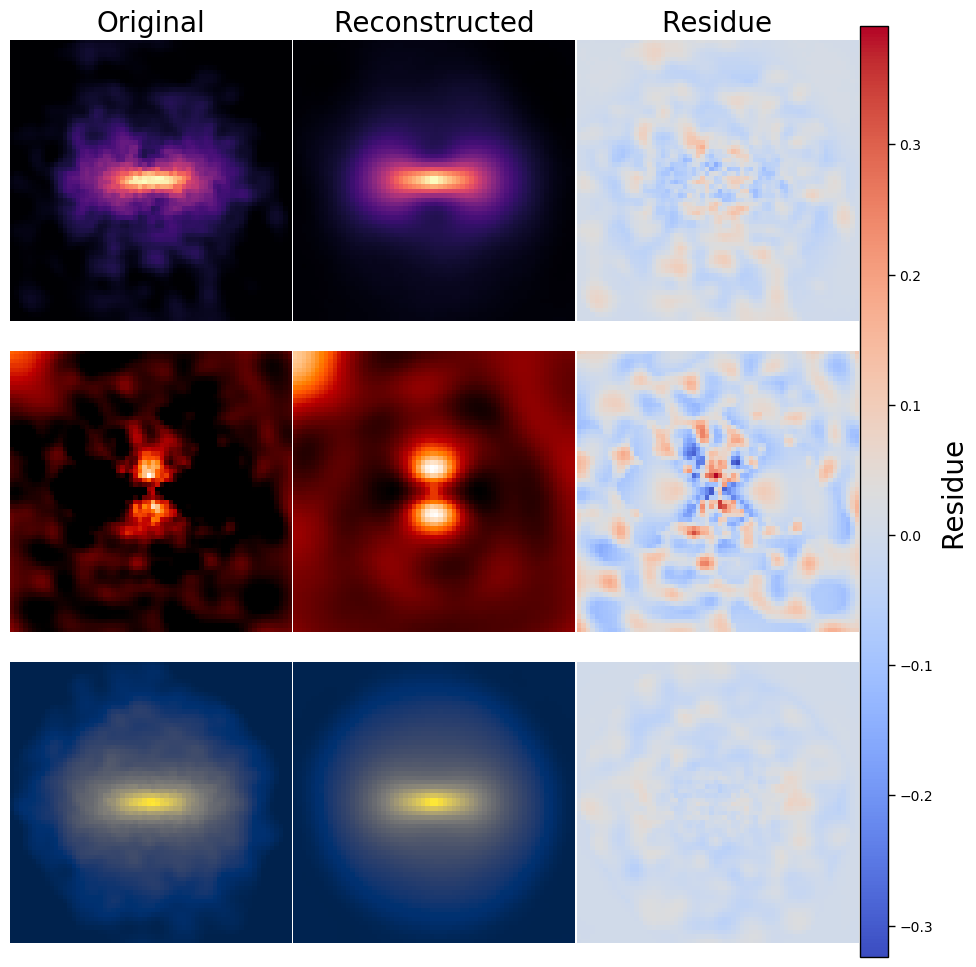

In [7]:
galindex = 30


og = original[galindex]
score = scores[galindex][:n_components]
eig = eigen[:n_components]




# savepath = None
savepath = f"reconstruction_{galindex}.pdf"



# give the arguments that would sort the scores in descending order
sort_args = np.argsort(np.abs(score))[::-1]


eig = eig.reshape(n_components, 3 * 64 ** 2)
means = means.reshape(3 * 64 ** 2)
reconstructed = np.dot(score, eig) + means
reconstructed = reconstructed.reshape(3, 64, 64)
residue = og - reconstructed.reshape(3, 64, 64)

# Calculate the range for the residue images
residue_min = np.min(residue)
residue_max = np.max(residue)


fig = plt.figure(figsize=figsize)
gs = GridSpec(3, 4, width_ratios=[1, 1, 1, 0.1])  # Adjust width ratios to accommodate the colorbar

for i in range(3):
    ax1 = fig.add_subplot(gs[i, 0])
    ax1.imshow(og[i], cmap=cmap[fields[i]])
    # ax1.text(*text_coords, fields[i], fontsize=labelsize, verticalalignment='center', horizontalalignment='left')
    ax1.axis("off")

    ax2 = fig.add_subplot(gs[i, 1])
    ax2.imshow(reconstructed[i], cmap=cmap[fields[i]])
    
        
    ax2.axis("off")

    ax3 = fig.add_subplot(gs[i, 2])
    im = ax3.imshow(residue[i], cmap="coolwarm", vmin=residue_min, vmax=residue_max)
    
    if i==0: 
        ax1.set_title(f"Original",fontsize=labelsize)
        ax2.set_title(f"Reconstructed", fontsize=labelsize)
        ax3.set_title(f"Residue", fontsize=labelsize)
    
    ax3.axis("off")

# Add a single colorbar on the right side
cax = fig.add_subplot(gs[:, 3])
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=10)
cbar.set_label("Residue", fontsize=labelsize)

plt.tight_layout(w_pad=w_pad,h_pad=h_pad)

if savepath is not None:
    plt.savefig(savepath, dpi=300, bbox_inches='tight')
plt.show()



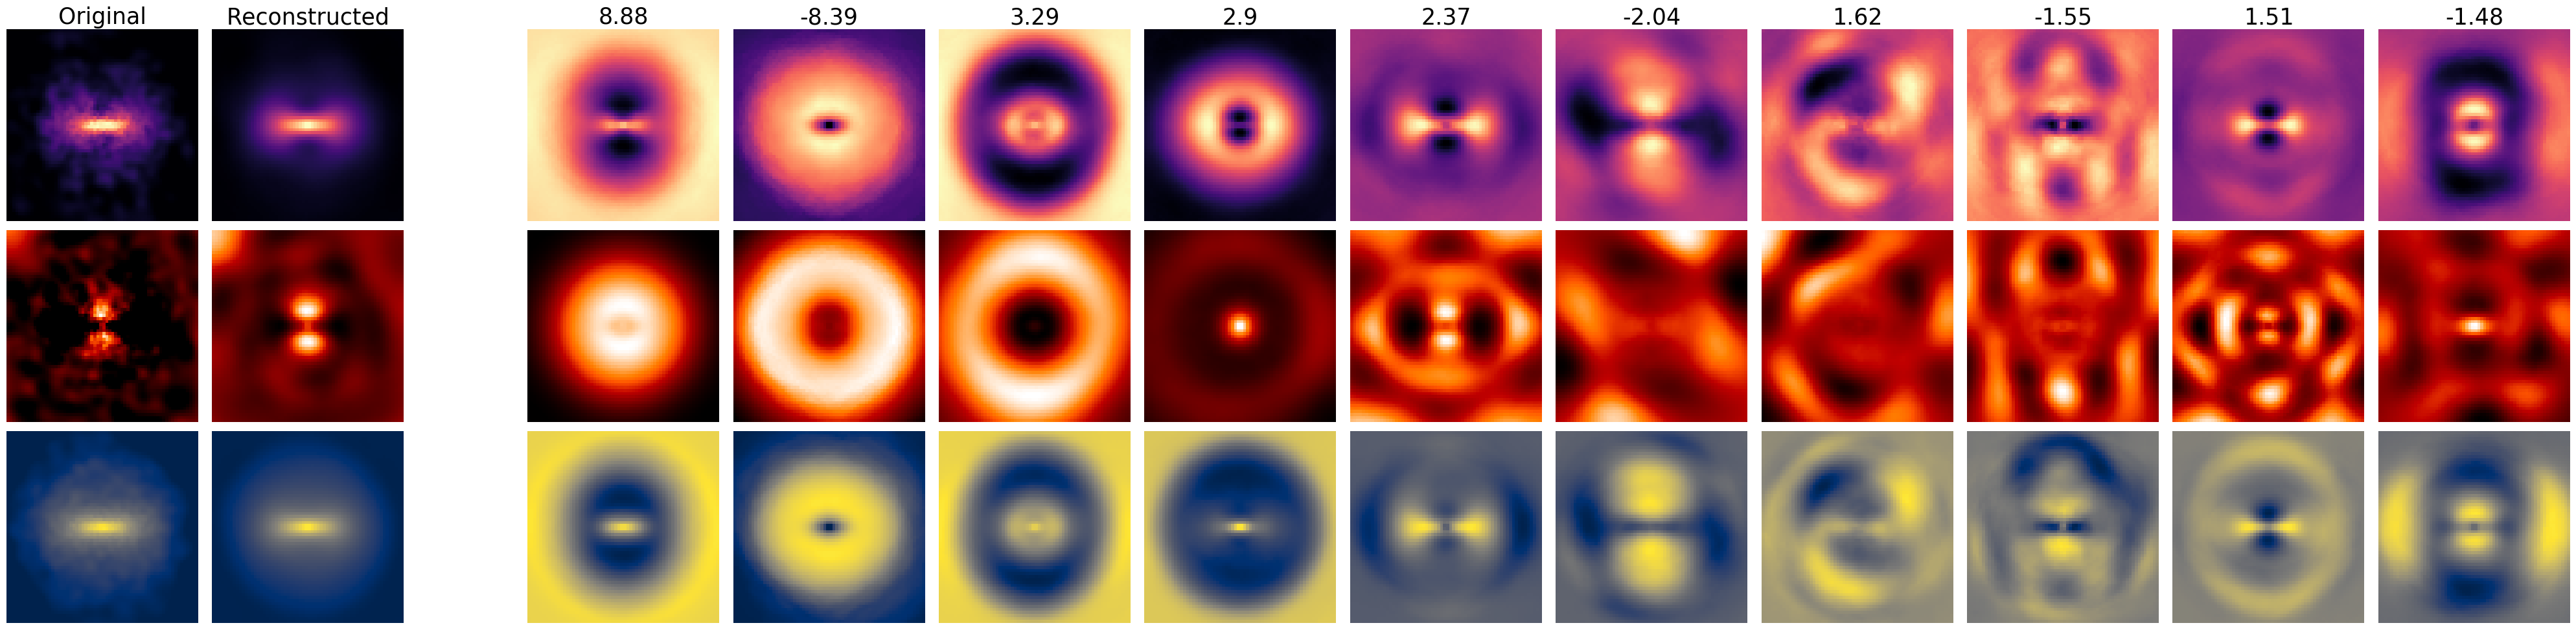

In [15]:

galindex = 30


og = original[galindex]
score = scores[galindex][:n_components]
eig = eigen[:n_components]




# savepath = None
savepath = f"reconstruction_{galindex}.pdf"



# give the arguments that would sort the scores in descending order
sort_args = np.argsort(np.abs(score))[::-1]


eig = eig.reshape(n_components, 3 * 64 ** 2)
means = means.reshape(3 * 64 ** 2)
reconstructed = np.dot(score, eig) + means
reconstructed = reconstructed.reshape(3, 64, 64)
residue = og - reconstructed.reshape(3, 64, 64)

# Calculate the range for the residue images








savepath = f"plots/decomposition_{galindex}.pdf"
figsize = (40, 10)  # Update this if needed
labelsize= 25

fig = plt.figure(figsize=figsize)  # Define the figure first
widths = [1, 1,0.5, 1, 1, 1, 1, 1, 1, 1, 1,1,1]  # Adjust width ratios to accommodate the colorbar
gs = GridSpec(3, 13, figure=fig, width_ratios=widths)  # Pass the figure to the GridSpec

for i in range(3):
    ax1 = fig.add_subplot(gs[i, 0])  # First two columns for original images
    ax1.imshow(og[i], cmap=cmap[fields[i]])
    ax1.axis("off")

    ax2 = fig.add_subplot(gs[i, 1])  # Next two columns for reconstructed images
    ax2.imshow(reconstructed[i], cmap=cmap[fields[i]])
    ax2.axis("off")
    if i == 0:
        ax1.set_title(f"Original", fontsize=labelsize)
        ax2.set_title(f"Reconstructed", fontsize=labelsize)

cmap_dict = {0: "magma", 1: "gist_heat", 2: "cividis"}

#add emtpy axis
ax3 = fig.add_subplot(gs[:, 2])
ax3.axis("off")

for i in range(3):
    for j in range(10):
        index = sort_args[j]
        ax = fig.add_subplot(gs[i, j+3])  # Allocate rest columns for eigengalaxies
        ax.imshow(eigengalaxies[index][i], cmap=cmap_dict[i])
        ax.axis("off")
        if i == 0:
            ax.set_title(round(score[index], 2), fontsize=labelsize)

plt.tight_layout(w_pad=0.01, h_pad=0.01)

if savepath is not None:
    plt.savefig(savepath, dpi=300, bbox_inches='tight')

